# Project Machine Learning: Neural Network vs. Traditional ML Models

In this Jupyter Notebook we will compare different ML models to a feedforward Neural Network, and compare differences in results. The data used to do this is a Kaggle dataset with heart disease data.

In [ ]:
import pandas as pd
import numpy as np
import keras
import torch

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

## 1. Loading the data - pandas

In [85]:
df = pd.read_csv("heart disease data\heart_disease_risk_dataset_earlymed.csv")
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986,0.500000
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


## 2. Logistic Regression

In [86]:
scaler = MinMaxScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])

X = df.drop(columns=["Heart_Risk"]).values
y = df["Heart_Risk"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [87]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [88]:
y_pred = clf_lr.predict(X_test)
y_pred_prob = clf_lr.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .2f}')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

Accuracy:  0.99


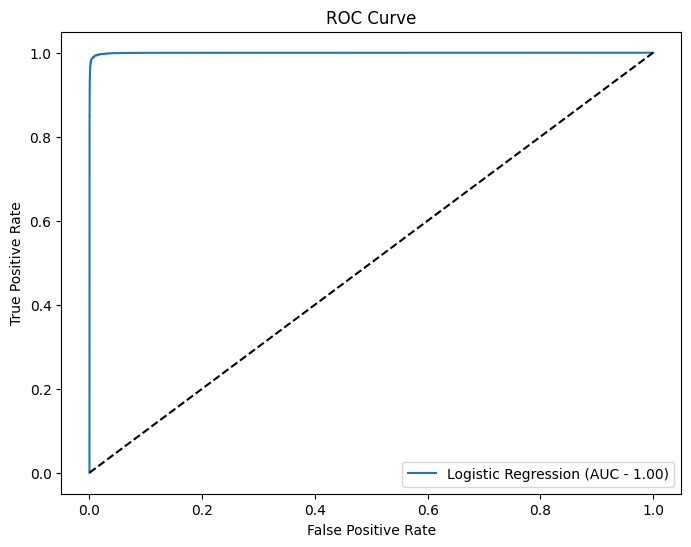

In [89]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC - {roc_auc:.2f})")
plt.plot([0, 1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
example_instance = np.array([[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 50]])

example_instance[:, 17] = scaler.transform(example_instance[:, [17]])

predicted_class = clf_lr.predict(example_instance)
predicted_probability = clf_lr.predict_proba(example_instance)[:, 1]

print("Predicted Risk (0=Low, 1=High):", predicted_class[0])
print("Predicted Probability of High Risk:", predicted_probability[0])

Predicted Risk (0=Low, 1=High): 1.0
Predicted Probability of High Risk: 0.7424842971147967


c:\Users\jayde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [91]:
cv_scores = cross_val_score(clf_lr, X, y, cv=5, scoring="accuracy")
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Cross-validation Accuracy: {:.2f}".format(cv_scores.mean()))

Cross-validation Accuracy Scores: [0.99042857 0.99221429 0.99235714 0.99185714 0.99171429]
Mean Cross-validation Accuracy: 0.99


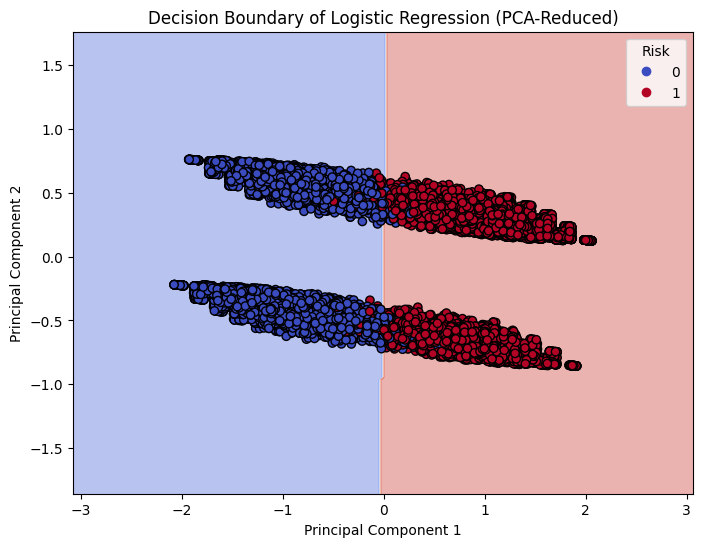

In [ ]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

clf_lr_2d = LogisticRegression()
clf_lr_2d.fit(X_train_2d, y_train)

x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = clf_lr_2d.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundary of Logistic Regression (PCA-Reduced)")
plt.legend(*scatter.legend_elements(), title="Risk")
plt.show()

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     17459
         1.0       0.99      0.99      0.99     17541

    accuracy                           0.99     35000
   macro avg       0.99      0.99      0.99     35000
weighted avg       0.99      0.99      0.99     35000

Confusion Matrix:
 [[17293   166]
 [  129 17412]]


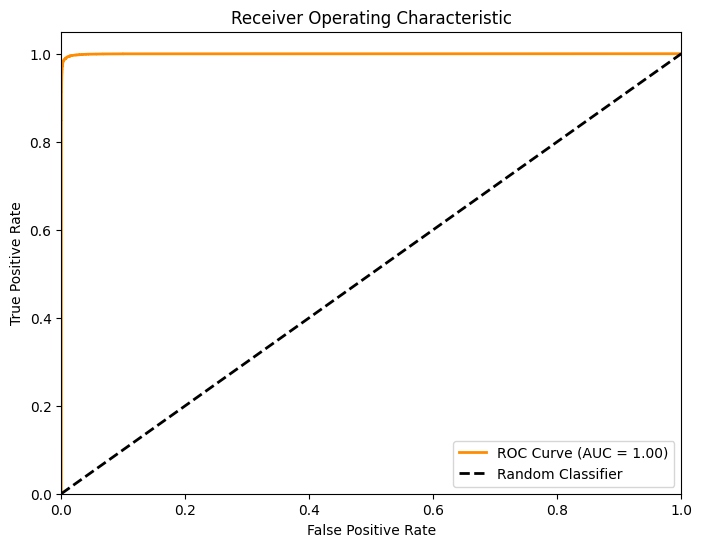

In [ ]:

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()